Wykonali: Adrianna Baczyńska, Krzysztof Trepka </br>
Grupa: WCY19IJ2S1

In [33]:
!python -m spacy download en_core_web_md

     ---------------------------------------- 33.5/33.5 MB 1.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import nltk
import requests
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
#nltk.download('punkt')
import urllib.request
import string
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
import matplotlib
from matplotlib.pyplot import plot, loglog, show
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
import math
from sklearn.decomposition import PCA, TruncatedSVD
import seaborn as sns
import spacy
from spacy.tokens import Doc
import itertools
from nltk.stem import WordNetLemmatizer
from scipy.sparse import csr_matrix

In [35]:
def file_to_text(path):
    f = open(path, 'r', encoding='utf-8')
    content = f.read()
    f.close()
    return content

In [36]:
football1 = file_to_text('pjn-artykuły/football1.txt')
football2 = file_to_text('pjn-artykuły/football2.txt')
football3 = file_to_text('pjn-artykuły/football3.txt')
space1 = file_to_text('pjn-artykuły/space1.txt')
space2 = file_to_text('pjn-artykuły/space2.txt')
space3 = file_to_text('pjn-artykuły/space3.txt')
economy1 = file_to_text('pjn-artykuły/economy1.txt')
economy2 = file_to_text('pjn-artykuły/economy2.txt')
economy3 = file_to_text('pjn-artykuły/economy3.txt')


In [37]:
corpus = [football1, football2, football3, space1, space2, space3, economy1, economy2, economy3]

In [38]:
docs = []
nlp = spacy.load("en_core_web_md")

In [39]:
for article in corpus:
    docs.append(nlp(article))

In [40]:
lemmats = []
for index, doc in enumerate(docs):
    lemmats.append([])
    for token in doc:
        if token.text.isalpha() and token.text not in ['—', '„', '”', '…', ',', '.']:
            lemmats[index].append(token.lemma_.lower())

In [41]:
lemmatsJoined = list(map(lambda tokens: " ".join(tokens), lemmats))

In [42]:
vec = CountVectorizer(stop_words = 'english')
dtm = vec.fit_transform(lemmatsJoined)
dtmDf= pd.DataFrame(dtm.toarray(), columns=vec.get_feature_names_out(), index = ["football1", "football2", "football3", "space1",
                                                                            "space2", "space3", "economy1", "economy2", "economy3"])
print("DTM: \n", dtmDf)

DTM: 
            abandon  able  aboard  abound  absorb  abyss  accelerate  \
football1        1     2       0       0       0      0           0   
football2        0     0       0       0       0      0           0   
football3        0     1       0       1       0      0           0   
space1           0     2       1       0       0      0           0   
space2           0     0       0       0       0      1           0   
space3           0     1       0       0       0      0           0   
economy1         1     0       0       0       0      0           0   
economy2         0     0       0       0       1      0           1   
economy3         0     0       0       0       0      0           0   

           accommodation  accompany  accord  ...  young  youngster  yoy  zero  \
football1              0          2       0  ...      0          0    0     0   
football2              0          0       0  ...      1          0    0     0   
football3              0          0    

In [43]:
svd = TruncatedSVD(n_components=3, n_iter=7)

In [44]:
dtm_transformed = svd.fit_transform(dtm)

In [45]:
print("U @ S:\n\n",dtm_transformed)

U @ S:

 [[ 13.14222444   2.7626837   38.24987662]
 [ 10.87545255   2.85024659  26.01587115]
 [ 10.07879913   2.52706784  29.23107278]
 [ 48.98815844 -36.1733403   -9.90883594]
 [ 42.74514325 -29.60577796  -7.50798449]
 [ 27.27224227 -15.3999321   10.1127272 ]
 [ 34.86678865  44.65266096  -3.94123051]
 [ 31.65269072  40.07083062 -10.4237949 ]
 [ 22.8606016   23.60127673  -3.60134827]]


In [46]:
print(svd.singular_values_)

[90.01961312 81.24570638 58.20923337]


In [47]:
smat = np.zeros([3,3])

In [48]:
np.fill_diagonal(smat,svd.singular_values_)

In [49]:
U = dtm_transformed@np.linalg.inv(smat)
print("Macierz U:\n\n", U)

Macierz U:

 [[ 0.1459929   0.03400406  0.65711013]
 [ 0.12081203  0.03508181  0.44693719]
 [ 0.11196226  0.03110402  0.50217244]
 [ 0.54419428 -0.44523387 -0.17022791]
 [ 0.47484256 -0.36439806 -0.12898271]
 [ 0.30295889 -0.18954764  0.17373064]
 [ 0.38732436  0.54960026 -0.067708  ]
 [ 0.35161994  0.49320552 -0.1790746 ]
 [ 0.25395134  0.2904926  -0.06186902]]


In [50]:
print("Macierz S: \n\n", smat)

Macierz S: 

 [[90.01961312  0.          0.        ]
 [ 0.         81.24570638  0.        ]
 [ 0.          0.         58.20923337]]


In [51]:
print("Macierz Vt:\n\n", svd.components_)

Macierz Vt:

 [[ 0.00592446  0.01994338  0.00604529 ...  0.00134206  0.01682738
   0.00336548]
 [ 0.0071832  -0.01207329 -0.00548009 ...  0.0004318  -0.01166509
  -0.00233302]
 [ 0.01012558  0.02834031 -0.00292441 ...  0.00767812  0.01492294
   0.00298459]]


In [52]:
print("Macierz V:\n\n", svd.components_.T)

Macierz V:

 [[ 0.00592446  0.0071832   0.01012558]
 [ 0.01994338 -0.01207329  0.02834031]
 [ 0.00604529 -0.00548009 -0.00292441]
 ...
 [ 0.00134206  0.0004318   0.00767812]
 [ 0.01682738 -0.01166509  0.01492294]
 [ 0.00336548 -0.00233302  0.00298459]]


In [53]:
def generate_frequency(names, freq):
    result = {}
    for index, name in enumerate(names):
        result[name] = freq[index]
    return result

In [54]:
topicFreqs = []
for freq in svd.components_:
    topicFreqs.append(generate_frequency(vec.get_feature_names_out(),freq))

In [55]:
from wordcloud import WordCloud

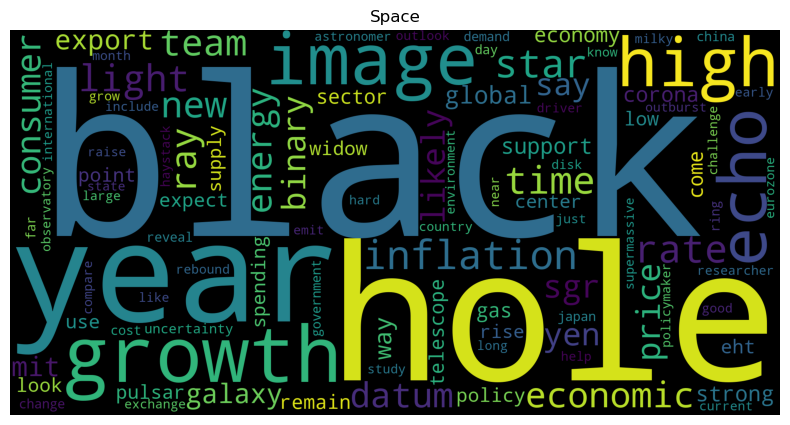

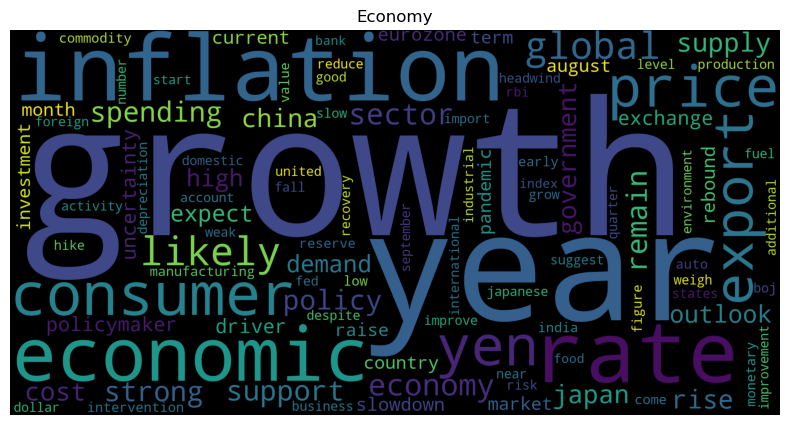

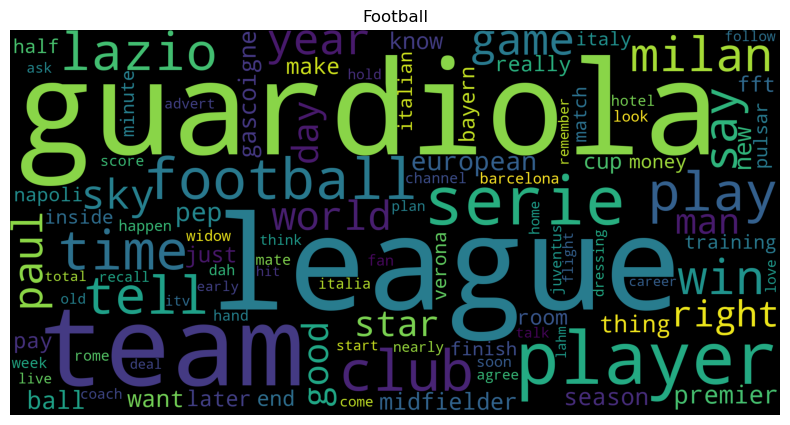

In [56]:
wc = WordCloud(background_color="black",width=2000,height=1000,normalize_plurals=False, max_words = 100).generate_from_frequencies(topicFreqs[0])
plt.figure(figsize=(10,5))
plt.axis('off')
plt.title("Space")
plt.imshow(wc)

wc = WordCloud(background_color="black",width=2000,height=1000,normalize_plurals=False, max_words = 100).generate_from_frequencies(topicFreqs[1])
plt.figure(figsize=(10,5))
plt.axis('off')
plt.title("Economy")
plt.imshow(wc)

wc = WordCloud(background_color="black",width=2000,height=1000,normalize_plurals=False, max_words = 100).generate_from_frequencies(topicFreqs[2])
plt.figure(figsize=(10,5))
plt.axis('off')
plt.title("Football")
plt.imshow(wc)

Jak widać, podział na tematy wygląda dość dobrze i jest wyraźny

Do wykonania wykresów radarowych użyliśmy biblioteki plotly

In [57]:
import plotly.express as px

In [58]:
def create_radar(values, labels_, title):
    labelsCopy = [*labels_, labels_[0]]
    valuesCopy = [*values, values[0]]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(valuesCopy))
    
    plt.figure(figsize=(5, 5))
    plt.subplot(polar=True)
    plt.plot(label_loc, valuesCopy)
    plt.title(title, size=10, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labelsCopy)
    plt.show()

In [59]:
labels = ["space", "economy", "football"]

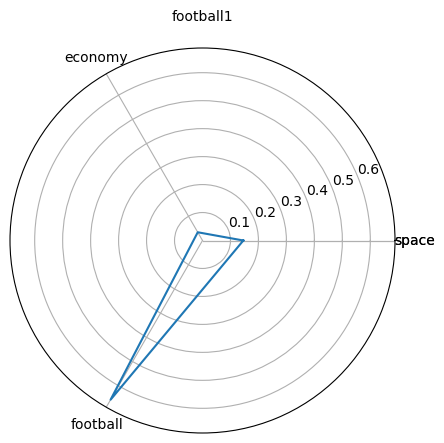

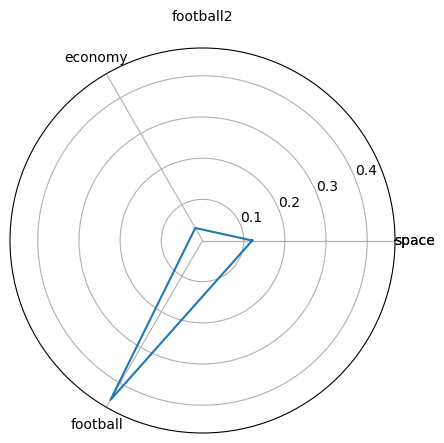

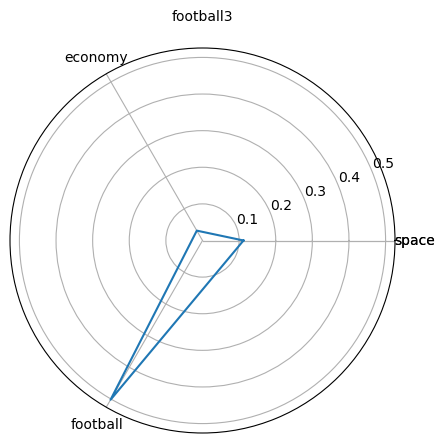

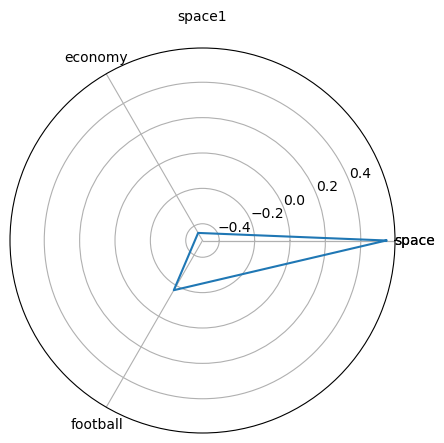

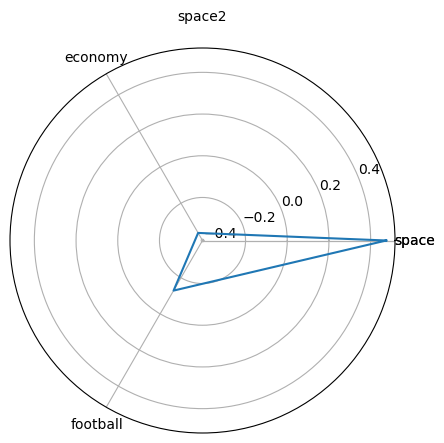

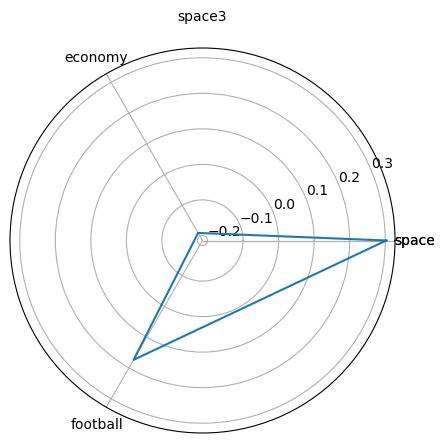

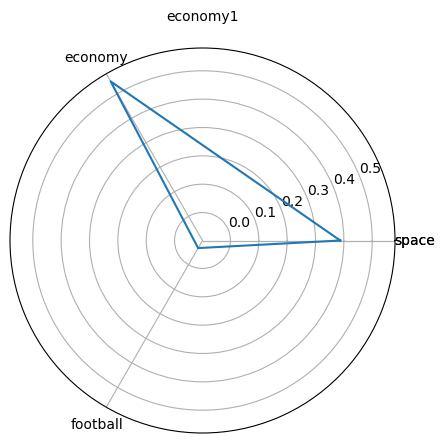

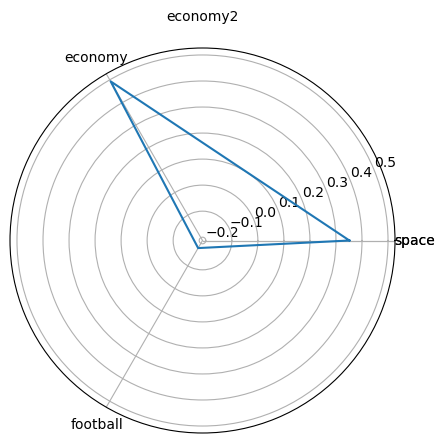

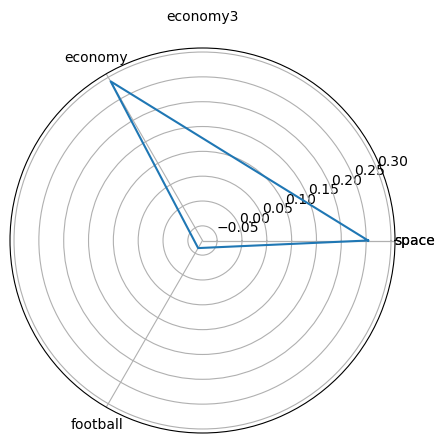

In [60]:
create_radar(U[0], labels, "football1")
create_radar(U[1], labels, "football2")
create_radar(U[2], labels, "football3")
create_radar(U[3], labels, "space1")
create_radar(U[4], labels, "space2")
create_radar(U[5], labels, "space3")
create_radar(U[6], labels, "economy1")
create_radar(U[7], labels, "economy2")
create_radar(U[8], labels, "economy3")